In [1]:
import requests  
# Downloading tesseract-ocr file
r = requests.get("https://raw.githubusercontent.com/tesseract-ocr/tessdata/4.00/ind.traineddata", stream = True)  
  
# Writing data to file to avoid path isuues
with open("ind.traineddata", "wb") as file:  
    for block in r.iter_content(chunk_size = 1024): 
         if block:  
             file.write(block)

In [2]:
# Installing libraries required for optical character recognition
#!  sudo apt install tesseract-ocr libtesseract-dev libmagickwand-dev

# Installing pytesseract and opencv
#! pip install pytesseract wand opencv-python

In [3]:
# Importing IPython to clear output which is not important 
from IPython.display import HTML, clear_output
#clear_output()
# Import libraries
from PIL import Image
import pytesseract
import cv2
import numpy as np
from pytesseract import Output
import re

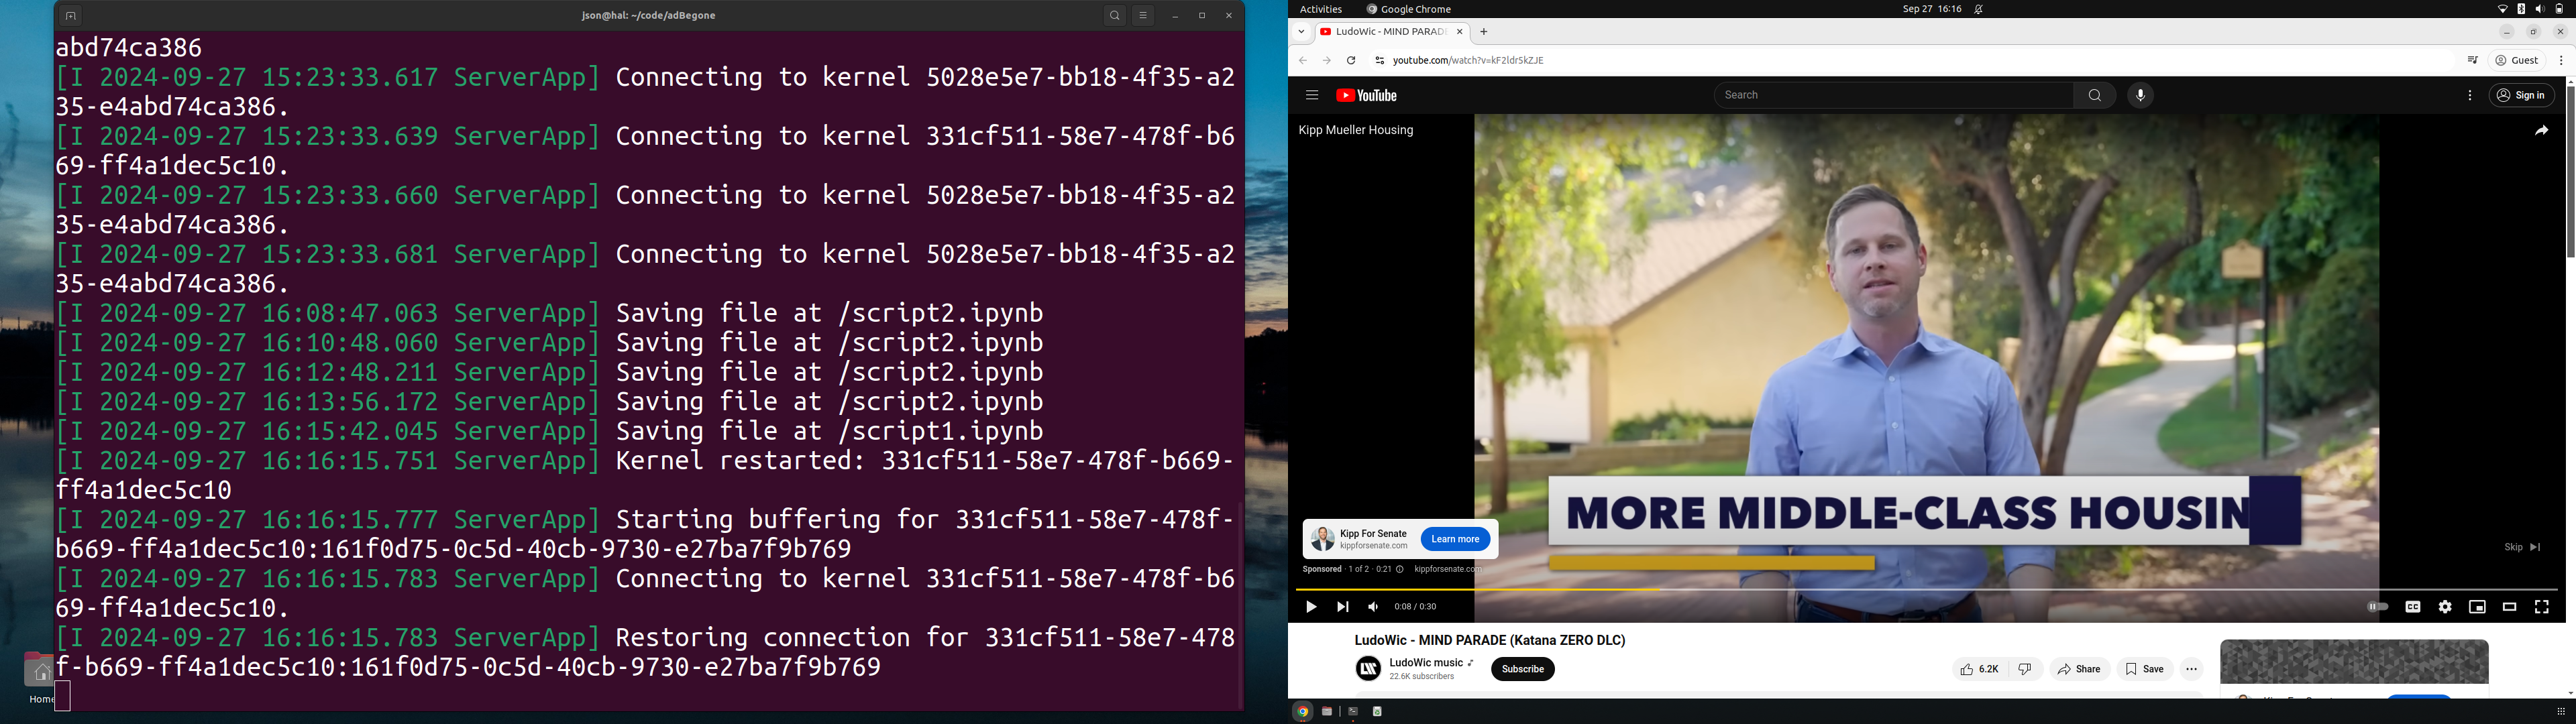

In [4]:
from PIL import ImageGrab
screenshot = ImageGrab.grab()
screenshot.save("screenshot.png")
#screenshot.show()
#screenshot.close()
screenshot

In [5]:
width,height = screenshot.size
cropped = screenshot.crop((0,100,width,height-100))
cropped
width,height #1920,1080
url = screenshot.crop((width//2+205,80,width-1598,105)) #height))
url

In [6]:
urlText = pytesseract.image_to_string(url)
urlText #if starts w youtube.com split contains youtube

'2.com/watch?v=kF\n\x0c'

In [7]:
sponsorFullScreen = screenshot.crop((width//2+40,980,width-1730,height-80)) #height))
sponsorFullScreen

In [8]:
sponsorFullScreenText = pytesseract.image_to_string(sponsorFullScreen)
sponsorFullScreenText

'fry: Ludo!\n\x0c'

In [9]:
sponsorTheater = screenshot.crop((width//2+18,840,width-1760,height-222)) #height))
sponsorTheater

In [10]:
sponsorTheaterText = pytesseract.image_to_string(sponsorTheater)
sponsorTheaterText

'Sponsored - 1 of 2 - 0:21\n\x0c'

In [11]:
arr=sponsorTheaterText.split(' ')
time = arr[-1].split('\n')[0]
time

'0:21'

In [12]:
sponsor = screenshot.crop((width//2+125,817,width-1640,height-245)) #height))
sponsor

In [13]:
sponsorText = pytesseract.image_to_string(sponsor)
sponsorText


'\x0c'

In [14]:
sponsorText.split('of')
if len(sponsorText) > 1:
    print("double ad") #time limit 20 seconds

In [15]:
skipFullScreen = screenshot.crop((width-110,height-133,width-78,height-110))
skipFullScreenText = pytesseract.image_to_string(skipFullScreen)
skipFullScreen
skipFullScreenText

'\x0c'

In [16]:
skipTheater = screenshot.crop((width-110,height-275,width-75,height-253))
skipTheaterText = pytesseract.image_to_string(skipTheater)
skipTheater
skipTheaterText

'A)\n\x0c'

In [17]:
skip = screenshot.crop((width-643,780,width-607,height-275))
skipText = pytesseract.image_to_string(skip) #terrible calibration if not theater
skip
skipText

'\x0c'

In [18]:
def check_yt(img):
    width,height = img.size
    url = img.crop((width//2+155,75,width-1682,100))
    urlText = pytesseract.image_to_string(url)
    return urlText.split('\n')[0] == 'youtube.com'
check_yt(screenshot)

True

In [19]:
import pyautogui
pyautogui.press('m')